In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('../Amazon/Amazon Sales data.csv')

In [3]:
sales

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
sales.shape

(100, 14)

In [5]:
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [8]:
sales['Year'] = sales['Order Date'].dt.year

In [9]:
sales['MonthName'] = sales['Order Date'].dt.strftime('%B') 

In [10]:
sales['Quarter'] = sales['Order Date'].dt.quarter 

In [11]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,MonthName,Quarter
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May,2
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August,3
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,May,2
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June,2
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,February,1


In [12]:
d1 = sales.groupby('Year')['Total Revenue'].sum()
d1

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Revenue, dtype: float64

In [13]:
d2 = sales.groupby('Year')['Total Profit'].sum()
d2

Year
2010    6629567.43
2011    2741008.23
2012    9213010.12
2013    6715420.04
2014    5879461.68
2015    3996539.44
2016    4903838.01
2017    4089353.45
Name: Total Profit, dtype: float64

In [14]:
sales.groupby('MonthName')['Total Revenue'].sum()

MonthName
April        16187186.33
August        1128164.91
December      7249462.12
February     24740517.77
January      10482467.12
July         15669518.50
June          5230325.77
March         2274823.87
May          13215739.99
November     20568222.76
October      15287576.61
September     5314762.56
Name: Total Revenue, dtype: float64

<AxesSubplot:>

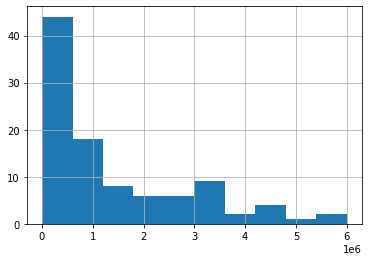

In [15]:
sales['Total Revenue'].hist()

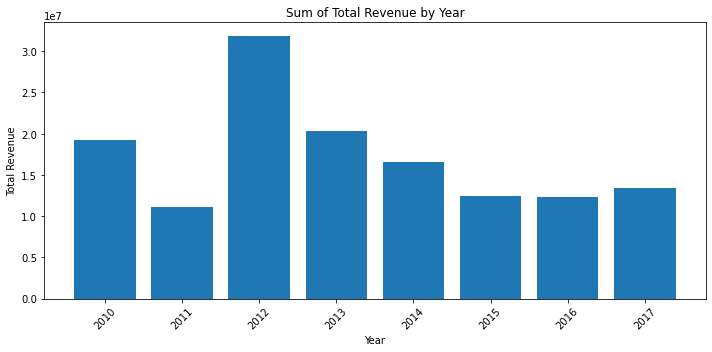

In [16]:
revenue_by_year = sales.groupby('Year')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(revenue_by_year['Year'], revenue_by_year['Total Revenue'])
plt.title('Sum of Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


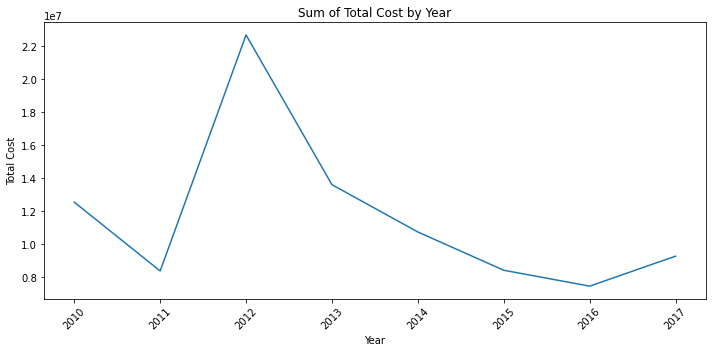

In [17]:
cost_by_year = sales.groupby('Year')['Total Cost'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(cost_by_year['Year'], cost_by_year['Total Cost'])
plt.title('Sum of Total Cost by Year')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


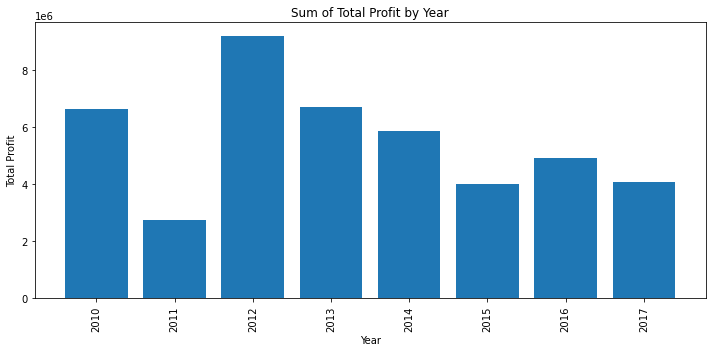

In [18]:
pft_by_year = sales.groupby('Year')['Total Profit'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(pft_by_year['Year'], pft_by_year['Total Profit'])
plt.title('Sum of Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

In [19]:
df = sales.groupby('Item Type')['Total Revenue'].sum()
df

Item Type
Baby Food          10350327.60
Beverages           2690794.60
Cereal              5322898.90
Clothes             7787292.80
Cosmetics          36601509.60
Fruits               466481.34
Household          29889712.29
Meat                4503675.75
Office Supplies    30585380.07
Personal Care       3980904.84
Snacks              2080733.46
Vegetables          3089057.06
Name: Total Revenue, dtype: float64

In [20]:
df = sales.groupby('Item Type')['Total Profit'].sum()
df

Item Type
Baby Food           3886643.70
Beverages            888047.28
Cereal              2292443.43
Clothes             5233334.40
Cosmetics          14556048.66
Fruits               120495.18
Household           7412605.71
Meat                 610610.00
Office Supplies     5929583.75
Personal Care       1220622.48
Snacks               751944.18
Vegetables          1265819.63
Name: Total Profit, dtype: float64

In [21]:
df = sales.groupby(['Country','Item Type'])['Total Revenue'].sum().reset_index()
top_products_by_country = df.sort_values(by=['Total Revenue'], ascending=False)
top_products_by_country.head(10)

,Country,Item Type,Total Revenue
31,Honduras,Household,5997054.98
58,Myanmar,Household,5513227.50
44,Lithuania,Office Supplies,5396577.27
51,Mexico,Household,4647149.58
10,Brunei,Office Supplies,4368316.68
64,Pakistan,Cosmetics,4324782.40
71,Samoa,Cosmetics,4220728.80
33,Iceland,Cosmetics,3876652.40
85,Switzerland,Cosmetics,3786589.20
15,Cameroon,Office Supplies,3593376.78


In [22]:
df = sales.groupby(['Year','Item Type'])['Total Revenue'].sum().reset_index()
top_products_by_year = df.sort_values(by=['Total Revenue'], ascending=False)
top_products_by_year.head(10)

,Year,Item Type,Total Revenue
26,2013,Cosmetics,11248281.60
50,2016,Cosmetics,9753057.60
21,2012,Office Supplies,9105218.22
19,2012,Household,8374759.64
2,2010,Cosmetics,6620956.80
28,2013,Office Supplies,6558987.12
58,2017,Household,5997054.98
11,2011,Office Supplies,5844609.75
44,2015,Household,5513227.50
5,2010,Office Supplies,5396577.27


In [24]:
sales.groupby(['Year','MonthName'])['Total Revenue'].sum()

Year  MonthName
2010  December     2581786.39
      February     3410661.12
      June         1082418.40
      May          2587973.26
      November     3458252.00
      October      6064933.75
2011  April        2798046.49
      February      387002.20
      January      1042225.35
      July           97040.64
      June           19103.44
      May           272410.45
      November     5938385.58
      September     574951.92
2012  April        4556012.38
      August        576782.80
      February     6707849.42
      January      1012884.00
      July         4445093.92
      June         2132075.27
      March         994765.42
      May          3782781.82
      October      3042246.77
      September    4648152.72
2013  April        3262562.10
      August         89623.98
      December      173676.25
      February     3296425.02
      July         8545511.20
      June         1352867.40
      March         835759.10
      October      2702770.40
      September      712

In [25]:
sales.groupby(['Year','Item Type'])['Total Revenue'].sum()

Year  Item Type    
2010  Baby Food        2533654.00
      Clothes          1998731.20
      Cosmetics        6620956.80
      Fruits             54319.26
      Household        2559474.10
                          ...    
2017  Cosmetics         793518.00
      Household        5997054.98
      Meat             2011149.63
      Personal Care     770223.52
      Snacks           1117953.66
Name: Total Revenue, Length: 62, dtype: float64